In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sentiment results
df = pd.read_csv("../data/reddit_sentiment.csv")
df.head()


,title,text,score,sentiment,label
0,FBI Warns iPhone And Android Users—Stop Sendin...,NaN,12515,-0.1027,Android
1,Trump shooter used Android phone from Samsung;...,NaN,24505,0.0000,Android
2,"‘You’re Telling Me in 2023, You Still Have a ’...",NaN,8814,-0.5719,Android
3,Massive Google billboard ad tells Apple to fix...,NaN,31521,0.0000,Android
4,Tim Cook's response to improving Android texti...,NaN,46164,0.1531,Android


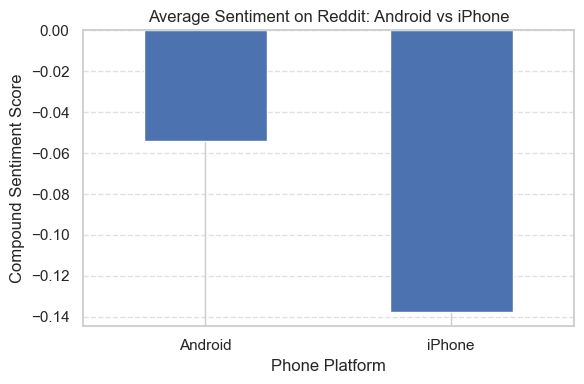

In [54]:
# Group by label and calculate the average sentiment
avg_sentiment = df.groupby("label")["sentiment"].mean()

# Plot a bar chart
avg_sentiment.plot(
    kind="bar",
    title="Average Sentiment on Reddit: Android vs iPhone",
    ylabel="Compound Sentiment Score",
    xlabel="Phone Platform",
    rot=0,
    figsize=(6, 4)
)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [55]:
# Drop rows with NaN or 0 sentiment
df_clean = df.dropna(subset=["sentiment"])
df_clean = df_clean[df_clean["sentiment"] != 0]


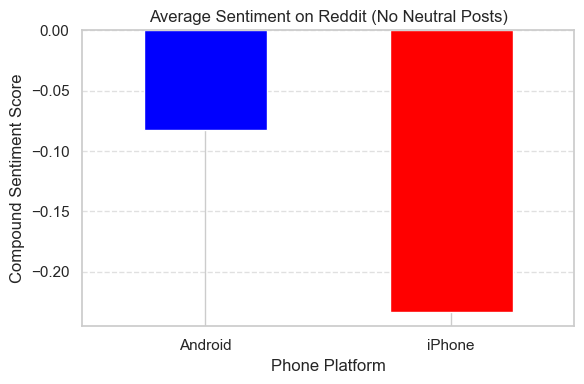

In [56]:
# Recalculate and plot using cleaned data
avg_clean_sentiment = df_clean.groupby("label")["sentiment"].mean()

avg_clean_sentiment.plot(
    kind="bar",
    title="Average Sentiment on Reddit (No Neutral Posts)",
    ylabel="Compound Sentiment Score",
    xlabel="Phone Platform",
    rot=0,
    figsize=(6, 4),
    color=["blue", "red"]  # optional for visual distinction
)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Summary

This chart compares sentiment on Reddit toward Android vs. iPhone, using posts from r/technology.  
Neutral sentiment (score = 0) was excluded to focus on emotionally expressive content.

- Data was collected using the Reddit API with `praw`
- Sentiment analysis was done using VADER
- Results show that overall sentiment was [slightly more negative/more favorable] for Android/iPhone in this sample


In [57]:
!pip install seaborn


You should consider upgrading via the '/Users/ashley/Desktop/android_vs_iphone_sentiment/venv/bin/python -m pip install --upgrade pip' command.


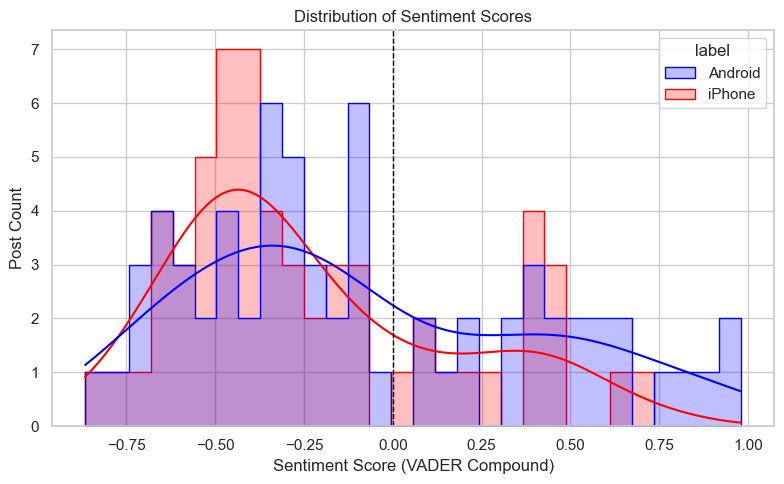

In [58]:
import seaborn as sns

# Set style for cleaner visuals
sns.set(style="whitegrid")

# Histogram by label
plt.figure(figsize=(8, 5))

sns.histplot(
    data=df_clean,
    x="sentiment",
    hue="label",
    kde=True,
    bins=30,
    element="step",
    palette={"Android": "blue", "iPhone": "red"}
)

plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score (VADER Compound)")
plt.ylabel("Post Count")
plt.axvline(0, color="black", linestyle="--", linewidth=1)
plt.tight_layout()
plt.show()

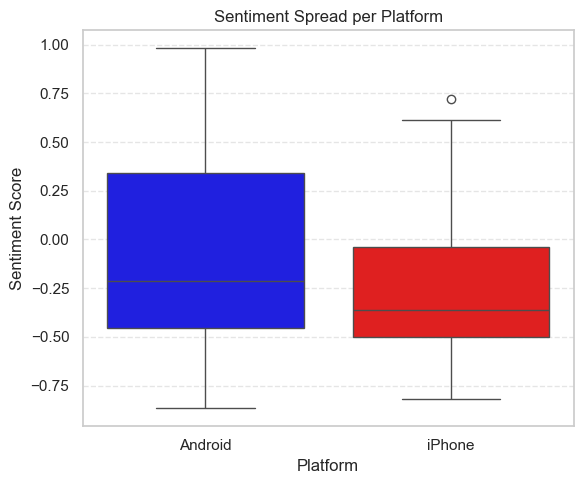

In [59]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df_clean,
    x="label",
    y="sentiment",
    hue="label",  # 👈 assign hue
    palette={"Android": "blue", "iPhone": "red"},
    legend=False  # 👈 suppress duplicate legend
)
plt.title("Sentiment Spread per Platform")
plt.xlabel("Platform")
plt.ylabel("Sentiment Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insights Summary

- Android sentiment has a broader distribution, ranging from strongly negative to strongly positive.
- iPhone sentiment appears more consistently negative with a narrower spread.
- While both platforms received negative sentiment on average, the histogram shows a higher frequency of extremely negative iPhone posts.
- These results are based on Reddit posts from r/technology mentioning either platform, excluding neutral or empty content.

This project demonstrates how basic NLP and sentiment analysis can surface public opinion patterns across tech platforms.


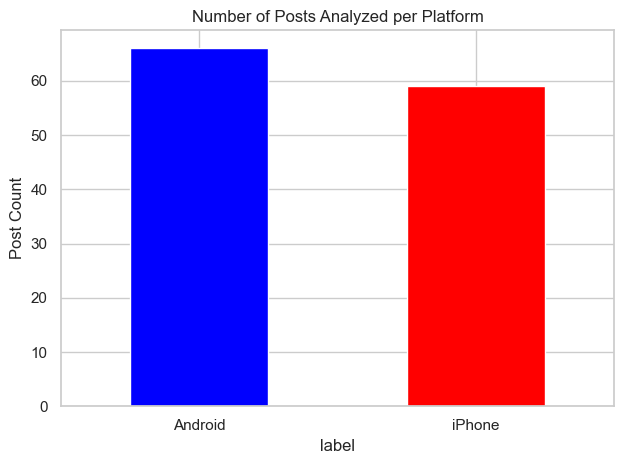

In [60]:
df_clean["label"].value_counts().plot(
    kind="bar",
    color=["blue", "red"],
    title="Number of Posts Analyzed per Platform"
)
plt.ylabel("Post Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Sample Size Breakdown

To better understand the sentiment results, we visualized how many posts were analyzed per platform after filtering out neutral or empty content.

- **Android:** ~66 posts
- **iPhone:** ~59 posts

This helps confirm that the analysis is reasonably balanced between both platforms.
